In [69]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [70]:
# 코드 보고 EDA 따라해두기

In [71]:
plt.style.use('seaborn')
plt.rc('font', size=13, family='Malgun gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

C:\Users\Jun\AppData\Local\Temp/ipykernel_14728/2402026103.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [72]:
train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')
topic = pd.read_csv('data/topic_dict.csv')
train

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


In [73]:
train.tail()

,index,title,topic_idx
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2
45653,45653,2020 한국인터넷기자상 시상식 내달 1일 개최…특별상 김성후,2


In [74]:
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [75]:
data = pd.concat([train, test]).reset_index().drop(columns=['level_0'])
data

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0
...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN


In [76]:
data = pd.merge(data, topic, how='left')
data

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계
...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN


In [77]:
# EDA를 할 때  test, train을 같이 전처리하는게 아니라 병합하고 전처리.

In [78]:
data['topic'].value_counts()

세계      7629
사회      7362
스포츠     6933
정치      6751
경제      6222
생활문화    5933
IT과학    4824
Name: topic, dtype: int64

<AxesSubplot:xlabel='topic', ylabel='count'>

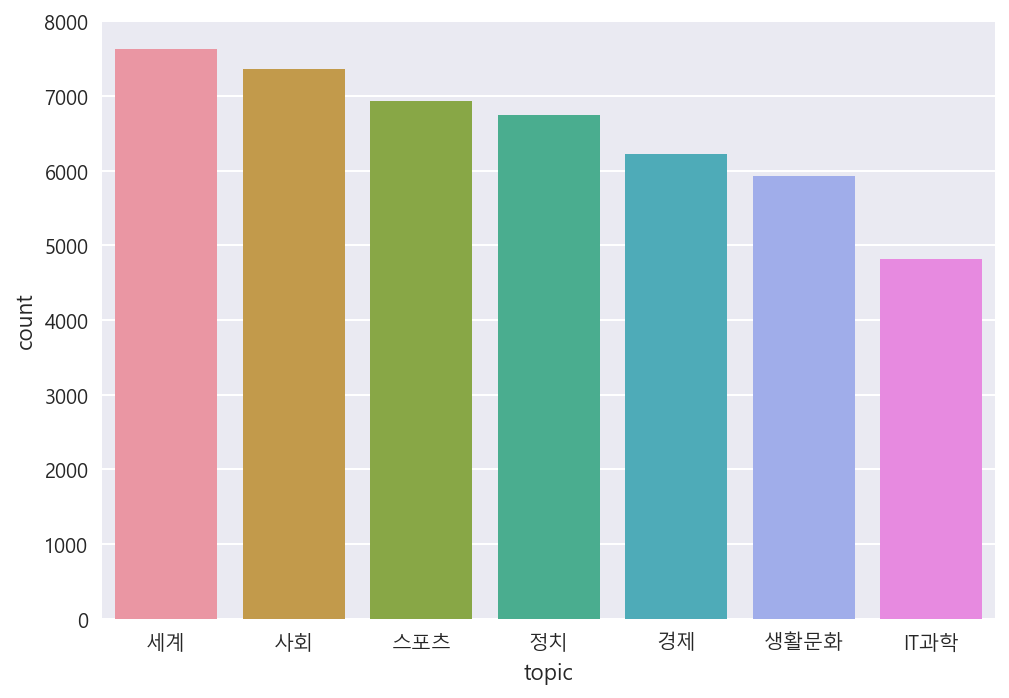

In [79]:
sns.countplot(data=data, x='topic', order=data['topic'].value_counts().index)

In [80]:
data['length'] = data['title'].map(lambda x: len(x))
data['word_count'] = data['title'].apply(lambda x: len(x.split()))
data['unique_word_count'] = data['title'].apply(lambda x: len(set(x.split())))
data

,index,title,topic_idx,topic,length,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7
...,...,...,...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN,28,6,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN,28,9,9
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6


In [81]:
# 파생변수는 데이터의 정보에 따라서 생성할 수 있다 -> 너무 어렵게 만들 필요가 없음

<AxesSubplot:xlabel='length', ylabel='Count'>

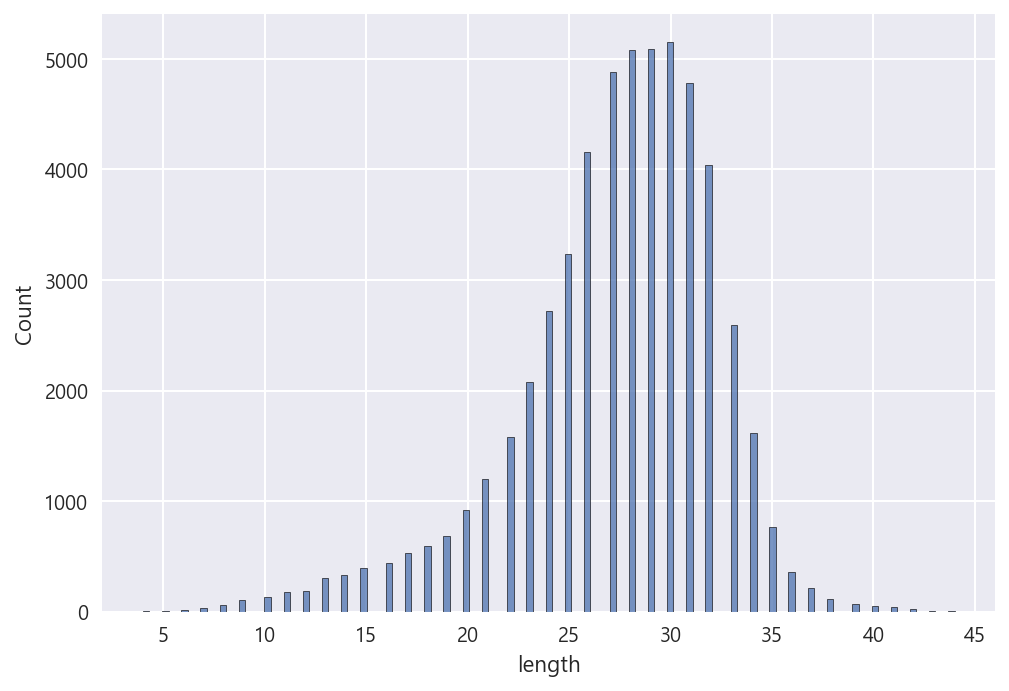

In [82]:
sns.histplot(data=data, x='length')

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'unique_word_count'}>,
        <AxesSubplot:>]], dtype=object)

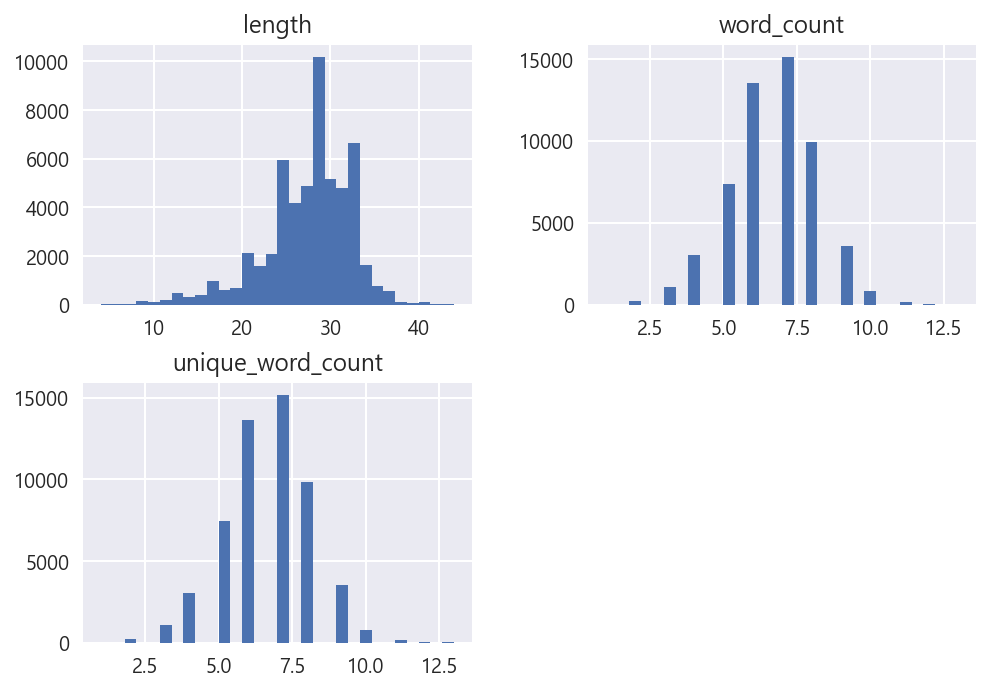

In [83]:
data[['length', 'word_count', 'unique_word_count']].hist(bins=30)

In [84]:
data[['length', 'word_count', 'unique_word_count']].describe()

,length,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


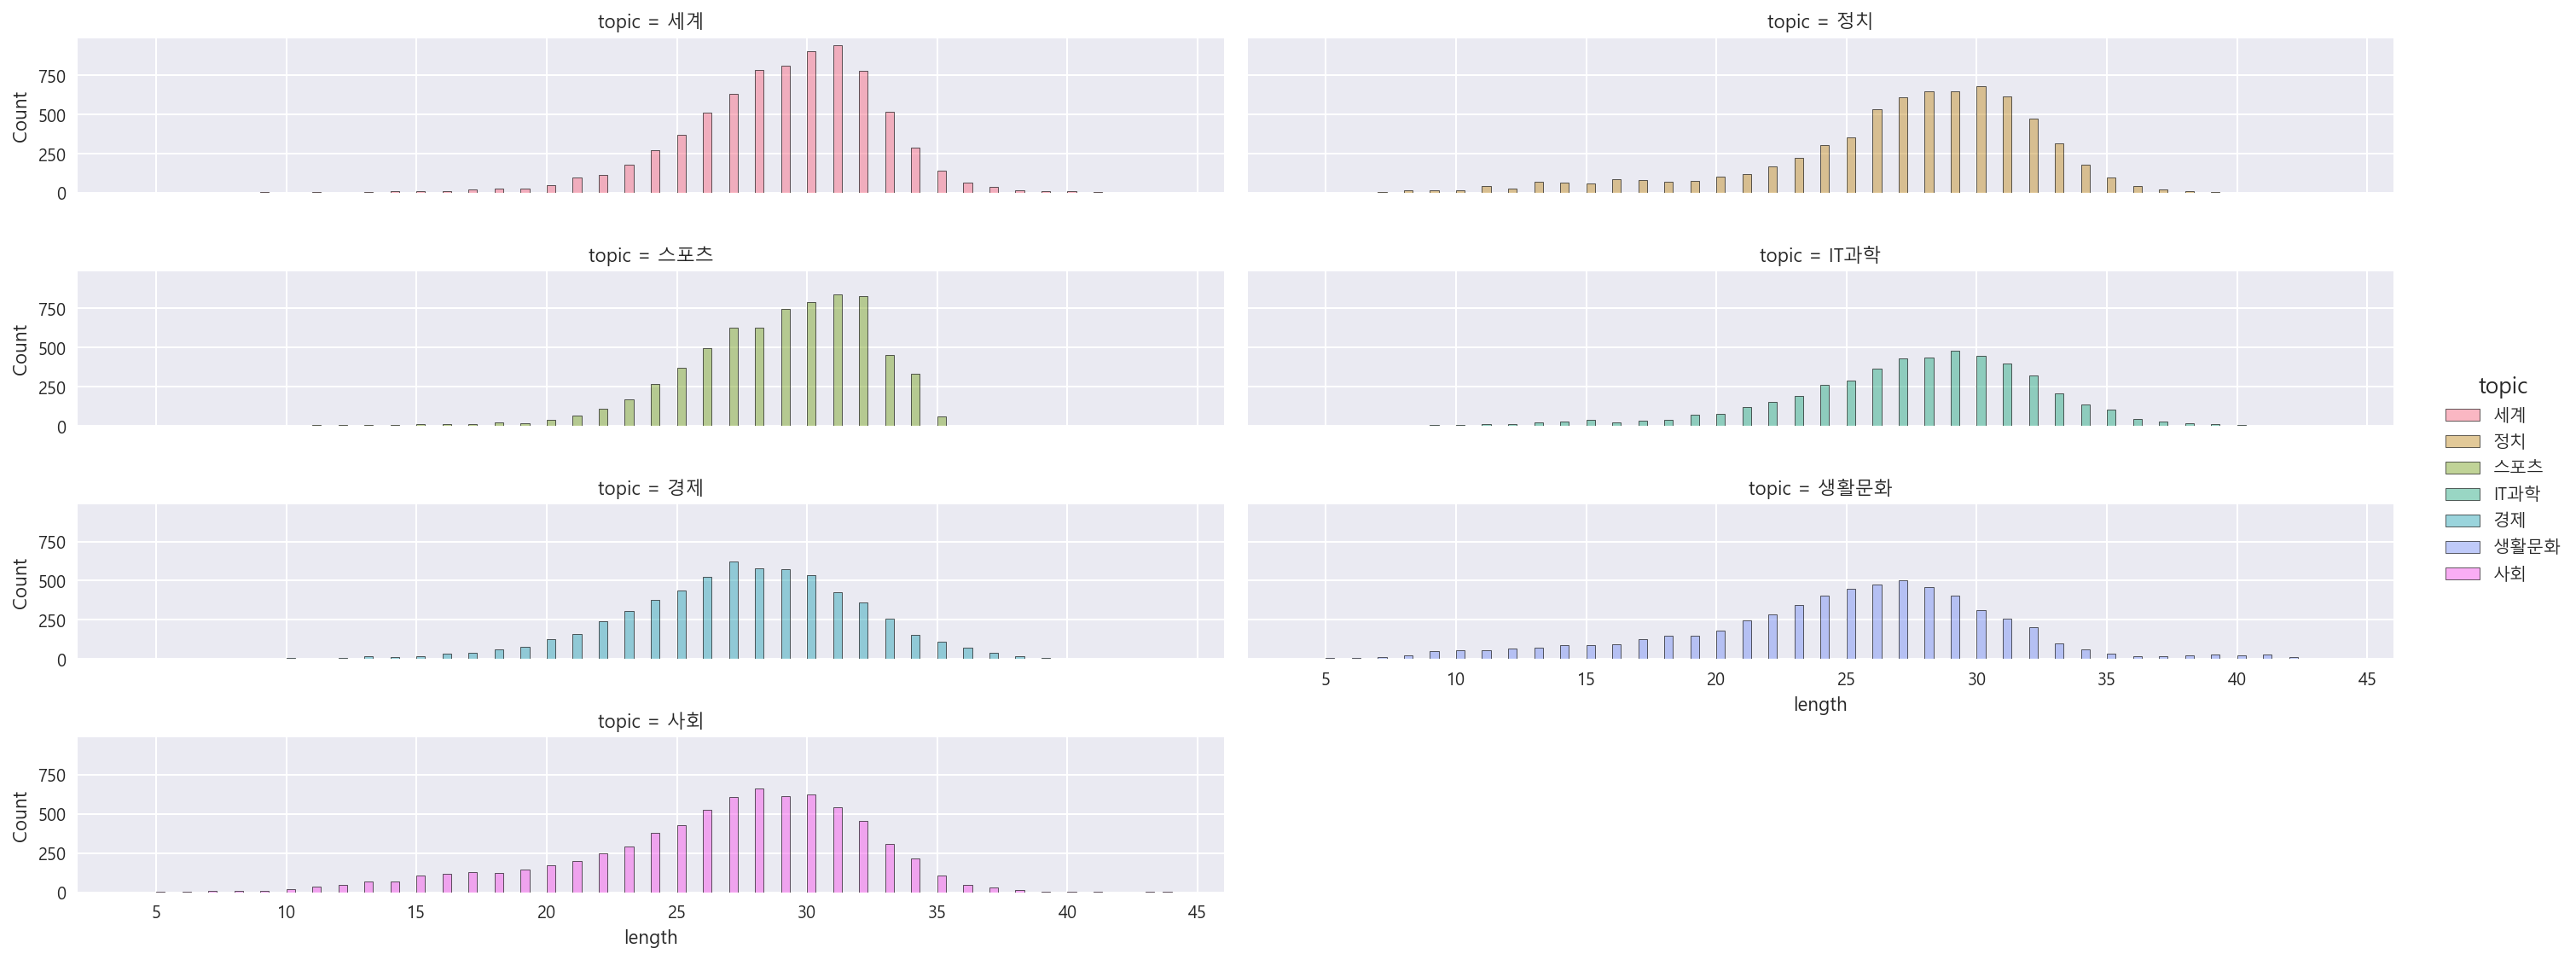

In [85]:
sns.displot(
    data=data,
    hue='topic',
    x='length',
    col='topic',
    col_wrap=2,
    height=2,
    aspect=5
)

In [86]:
# 간단히 EDA를 했으니 전처리 시작 단계
# 이 부분을 해보고 응용해서 전처리 및 모델 생성을 진행

X_train_text = train['title']
X_test_text = test['title']

X_train_text.shape, X_test_text.shape

((45654,), (9131,))

In [87]:
label_name = 'topic_idx'
label_name

'topic_idx'

In [88]:
y_train = train['topic_idx']
y_train

0        4
1        4
2        4
3        4
4        4
        ..
45649    1
45650    2
45651    1
45652    2
45653    2
Name: topic_idx, Length: 45654, dtype: int64

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(max_df=1.0, min_df=0.01)
cvect.fit(X_train_text)

CountVectorizer(min_df=0.01)

In [90]:
cvect.vocabulary_

{'이란': 6,
 '트럼프': 8,
 '대통령': 4,
 '朴대통령': 1,
 '감독': 2,
 '한국': 9,
 'kt': 0,
 '게시판': 3,
 '출시': 7,
 '신간': 5}

In [91]:
# train에만 CountVectorizer로 학습시켜준다
# test에도 학습할 시 서로 다른 단어 사전을 바라보기 때문
# -> 각각 참고하는 시험범위가 다른 상황에서 시험을 본다고 생각하면 된다.

In [92]:
# 같은 단어 vocab을 참고하여 transform 진행

X_train = cvect.transform(X_train_text)
X_test = cvect.transform(X_test_text)

X_train.shape, X_test.shape

((45654, 10), (9131, 10))

In [93]:
feature_names = cvect.get_feature_names()
feature_names

['kt', '朴대통령', '감독', '게시판', '대통령', '신간', '이란', '출시', '트럼프', '한국']

In [94]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [95]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [96]:
vocab_sum = np.sum(X_train.toarray(), axis=0)
vocab_sum

array([580, 610, 624, 734, 644, 671, 596, 733, 543, 507], dtype=int64)

In [97]:
series_vocab_sum = pd.Series(vocab_sum)
series_vocab_sum.index = feature_names
df_vocab_sum = series_vocab_sum.to_frame().T

In [98]:
df_vocab_sum

,kt,朴대통령,감독,게시판,대통령,신간,이란,출시,트럼프,한국
0,580,610,624,734,644,671,596,733,543,507


<AxesSubplot:>

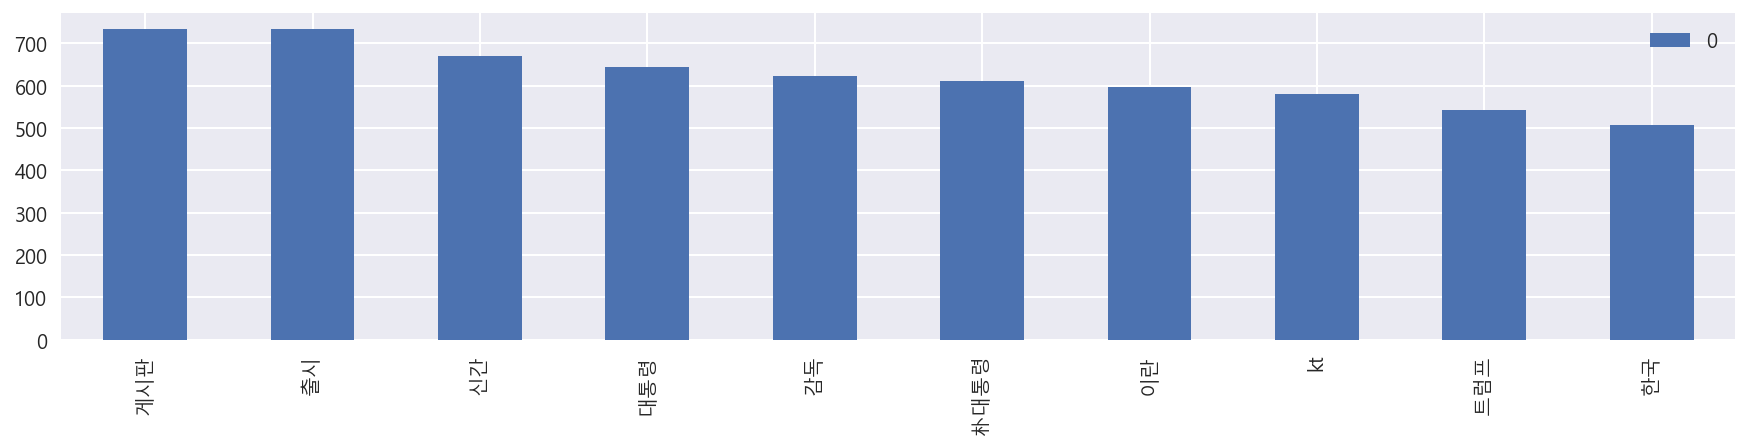

In [99]:
df_vocab_sum.T.sort_values(by=0, ascending=False).plot.bar(figsize=(15, 3))

In [100]:
# 위까지 가벼운 시각화
# 아래부터 전처리 시작

In [101]:
import re


def preprocessing(text):
    text = re.sub('\\\\n', ' ', text)
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ|a-zA-z]', ' ', text)
    text = re.sub('[\s]+', ' ', text)
    text = text.lower()
    return text

In [102]:
train['title'] = train['title'].map(preprocessing)
test['title'] = test['title'].map(preprocessing)

In [103]:
# 불용어 제거

def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['합니다', '하는', '할', '하고', '한다', '그리고', '입니다', '그', '등', '이런', '및', '제', '더']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [104]:
# train['title'] = train['title'].map(remove_stopwords)
# test['title'] = test['title'].map(remove_stopwords)

In [105]:
# X_train_text = train['title']
# X_test_text = test['title']

In [106]:
# label_name = 'topic_idx'

In [107]:
# y_train = train['topic_idx']
# y_train.head()

In [108]:
# CountVectorize 까지 해봤으니 혼자서 학습을 해볼까?
# 나머지 3개 동영상 보면서 마무리하기

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [111]:
fim = pd.Series(model.feature_importances_)
fim.index = feature_names
fim_large = fim.nlargest(30)
fim_large

신간      0.190606
朴대통령    0.160000
감독      0.152609
이란      0.130136
트럼프     0.116432
출시      0.099928
대통령     0.074313
kt      0.038246
게시판     0.030480
한국      0.007249
dtype: float64

<AxesSubplot:>

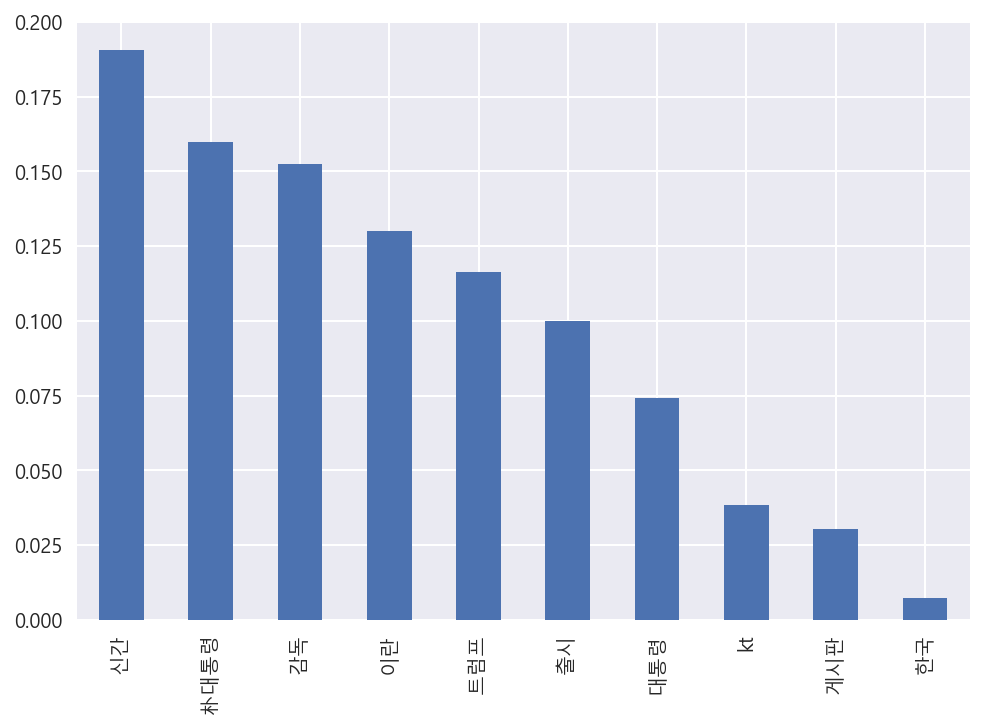

In [112]:
fim_large.plot.bar()

In [113]:
y_predict = model.predict(X_test)
y_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [114]:
# 이 아래에서 부터는 딥러닝 모델 만들어서 text prediction을 해볼 예정

In [117]:
X_train_text

0                인천 핀란드 항공기 결항 휴가철 여행객 분통
1             실리콘밸리 넘어서겠다 구글 조원 들여 전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        nyt 클린턴 측근 기업 특수관계 조명 공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
45649        kb금융 미국 ib 스티펠과 제휴 선진국 시장 공략
45650      보 서울시교육청 신종코로나 확산에 개학 연기 휴업 검토
45651              게시판 키움증권 키움 영웅전 실전투자대회
45652                   답변하는 배기동 국립중앙박물관장
45653        한국인터넷기자상 시상식 내달 일 개최 특별상 김성후
Name: title, Length: 45654, dtype: object

In [130]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import RNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [123]:
input_shape = X_train.shape

In [127]:
y_train

0        4
1        4
2        4
3        4
4        4
        ..
45649    1
45650    2
45651    1
45652    2
45653    2
Name: topic_idx, Length: 45654, dtype: int64

In [131]:
# create and fit the LSTM network
# 아니 딥러닝 모델을 못 만들겠네

model = Sequential()
model.add(RNN(4, input_shape=(input_shape[0], input_shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train.toarray(), y_train, epochs=100, batch_size=1, verbose=2)

ValueError: Argument `cell` should have a `call` method. The RNN was passed: cell=4